<a href="https://colab.research.google.com/github/IlyaMolchanovv/DIPLOM/blob/main/diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Классификация текстов

In [ ]:
!pip install pymorphy2
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 910.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=68d668844dfd8f334fe1dbf3eab8dc3a20af59d2617fc3f131242f3f05f6859b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pandas as pd
import pymorphy2
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
news = pd.read_csv('/content/news.csv')
news

,text,label
0,Помощник депутата Палаты представителей: мы да...,1
1,"Вы когда-нибудь чувствовали, что ваша жизнь дв...",0
2,Почему правда может привести к увольнению 29 о...,1
3,"Выявлено 15 мирных жителей, погибших в результ...",1
4,Распечатать\nИранская женщина была приговорена...,1
...,...,...
14995,САКРАМЕНТО. Когда Берни Сандерс провел митинг ...,0
14996,В конце времен врагами человека станут его дом...,1
14997,"ГОНКОНГ. Сотни гриндов, заплывших в мелководну...",0
14998,20:20\n( ͡° ͜ʖ ͡°)\n20:33\nHaloPro2121\nсмешно...,1


In [ ]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Zа-яА-Я0-9\s]','',text)
  words = word_tokenize(text)
  stop_words = set(stopwords.words('russian'))
  filtered_words = [word for word in words if word not in stop_words]
  morph = pymorphy2.MorphAnalyzer()
  lemmatized_words = [morph.parse(word)[0].normal_form for word in filtered_words]
  preprocessed_text = ' '.join(lemmatized_words)
  return preprocessed_text

In [ ]:
news['clean_text'] = news['text'].apply(preprocess_text)
news

,text,label,clean_text
0,Помощник депутата Палаты представителей: мы да...,1,помощник депутат палата представитель видеть п...
1,"Вы когда-нибудь чувствовали, что ваша жизнь дв...",0,когданибудь чувствовать ваш жизнь двигаться кр...
2,Почему правда может привести к увольнению 29 о...,1,почему правда привести увольнение 29 октябрь 2...
3,"Выявлено 15 мирных жителей, погибших в результ...",1,выявить 15 мирный житель погибнуть результат о...
4,Распечатать\nИранская женщина была приговорена...,1,распечатать иранский женщина приговорить шесть...
...,...,...,...
14995,САКРАМЕНТО. Когда Берни Сандерс провел митинг ...,0,сакраменто бернуть сандерс провести митинг отк...
14996,В конце времен врагами человека станут его дом...,1,конец время враг человек стать домочадец убить...
14997,"ГОНКОНГ. Сотни гриндов, заплывших в мелководну...",0,гонконг сотня гринд заплыть мелководный новозе...
14998,20:20\n( ͡° ͜ʖ ͡°)\n20:33\nHaloPro2121\nсмешно...,1,2020 2033 halopro2121 смешной 2108 лягушонок п...


In [ ]:
cl_news = news[['clean_text', 'label']]

In [ ]:
cl_news

,clean_text,label
0,помощник депутат палата представитель видеть п...,1
1,когданибудь чувствовать ваш жизнь двигаться кр...,0
2,почему правда привести увольнение 29 октябрь 2...,1
3,выявить 15 мирный житель погибнуть результат о...,1
4,распечатать иранский женщина приговорить шесть...,1
...,...,...
14995,сакраменто бернуть сандерс провести митинг отк...,0
14996,конец время враг человек стать домочадец убить...,1
14997,гонконг сотня гринд заплыть мелководный новозе...,0
14998,2020 2033 halopro2121 смешной 2108 лягушонок п...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cl_news['clean_text'])

In [ ]:
from sklearn.model_selection import train_test_split

y = cl_news['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Предсказанные')
plt.ylabel('Точные')
plt.title('Матрица ошибок')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1: ", f1)

In [ ]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)

print("Cross Validation Scores:")
for metric in scoring:
    print(f"{metric.capitalize()}: {cv_results['test_' + metric]}")

print(f"Mean Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Mean Precision: {cv_results['test_precision'].mean()}")
print(f"Mean Recall: {cv_results['test_recall'].mean()}")
print(f"Mean F1-score: {cv_results['test_f1'].mean()}")

Кластеризация по семантическому признаку

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

In [ ]:
df_clst = pd.read_csv('/content/df_for_clust.csv')
df_clst = df_clst[['text']]
df_clst

In [ ]:
df_clst = df_clst.drop_duplicates()
sampled_df_clst = df_clst.head(7000)
sampled_df_clst

In [18]:
sampled_df_clst['clean_text'] = sampled_df_clst['text'].apply(preprocess_text)
sampled_df_clst

<ipython-input-18-749955f25d58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['clean_text'] = sampled_df_clst['text'].apply(preprocess_text)


,text,clean_text
0,В 1930-е годы Советский Союз охватила лихорадк...,1930 год советский союз охватить лихорадка дес...
1,Олимпийская чемпионка по фигурному катанию Ал...,олимпийский чемпионка фигурный катание алина з...
2,Российский врач-диетолог Римма Мойсенко объясн...,российский врачдиетолог римма мойсенко объясни...
3,В 2019 году телеканал «Ю» запустил адаптацию з...,2019 год телеканал ю запустить адаптация знаме...
4,Актер Михаил Ефремов систематически употребл...,актёр михаил ефрем систематически употреблять ...
...,...,...
6995,"МОСКВА, 17 авг — РИА Новости, Мария Марикян...",москва 17 авг риа новость мария марикян захари...
6996,"МОСКВА, 17 авг — РИА Новости, Альфия Еникеева....",москва 17 авг риа новость альфий еникеев вирус...
6997,"МОСКВА, 17 авг — РИА Новости. В Пензе азы ф...",москва 17 авг риа новость пенза аз финансовый ...
6998,"МОСКВА, 17 авг — РИА Новости, Анна Нехаева. З...",москва 17 авг риа новость анна нехаева запомин...


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from gensim import corpora

In [20]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix_news = tfidf_vectorizer.fit_transform(cl_news['clean_text'])
tfidf_matrix_clust = tfidf_vectorizer.transform(sampled_df_clst['clean_text'])

In [21]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix_clust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
sampled_df_clst['cluster'] = clusters

<ipython-input-22-c1d850de5b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['cluster'] = clusters


In [23]:
tokenized_news = [text.split() for text in cl_news['clean_text']]
word2vec_model = Word2Vec(sentences=tokenized_news, vector_size=100, window=5, min_count=1, sg=0)

In [24]:
def calculate_similarity(cluster_text, news_text, model):
    cluster_vector = []
    for word in cluster_text:
        if word in model.wv:
            cluster_vector.append(model.wv[word])

    if not cluster_vector:
        return 0.0

    cluster_vector = sum(cluster_vector) / len(cluster_vector)

    news_vector = []
    for word in news_text:
        if word in model.wv:
            news_vector.append(model.wv[word])

    if not news_vector:
        return 0.0

    news_vector = sum(news_vector) / len(news_vector)

    similarity = model.wv.cosine_similarities(cluster_vector, [news_vector])[0]
    return similarity

In [25]:
first_news_text = cl_news.loc[0, 'clean_text'].split()
first_clust_text = sampled_df_clst[sampled_df_clst['cluster'] == 0]['clean_text'].iloc[0].split()
similarity_score = calculate_similarity(first_clust_text, first_news_text, word2vec_model)

print(f"Оценка схожести: {similarity_score}")

Оценка схожести: 0.8406426310539246


In [26]:
from sklearn.decomposition import PCA

<ipython-input-27-07c0d35f3980>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['pca_1'] = pca_result[:, 0]
<ipython-input-27-07c0d35f3980>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['pca_2'] = pca_result[:, 1]


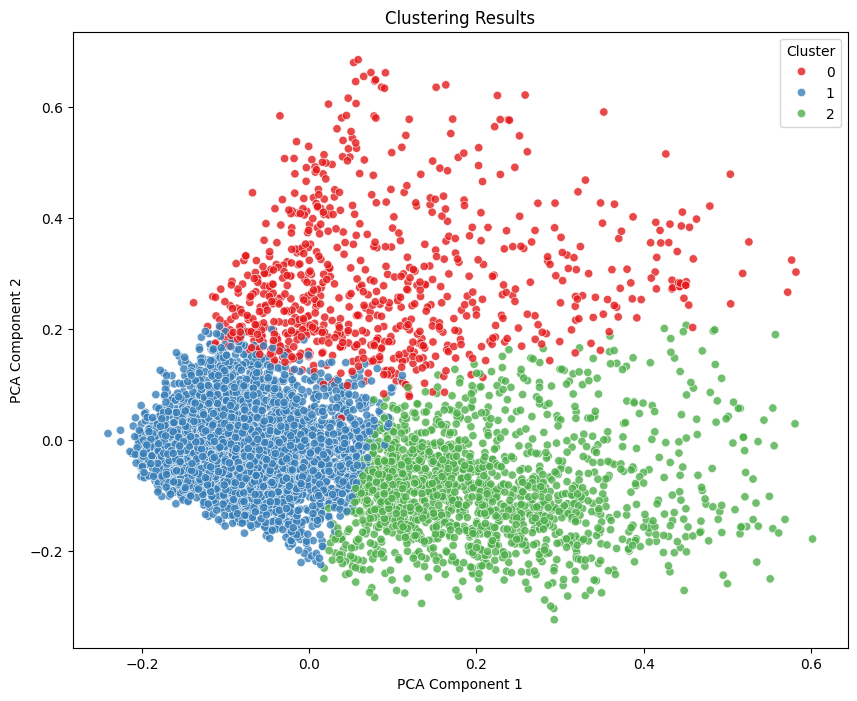

In [27]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_clust.toarray())

sampled_df_clst['pca_1'] = pca_result[:, 0]
sampled_df_clst['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=sampled_df_clst, palette='Set1', legend='full', alpha=0.8)
plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [46]:
kmeans.fit(tfidf_matrix_clust)
def print_cluster_keywords(tfidf_matrix, kmeans, vectorizer, num_clusters):
  order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
  terms = vectorizer.get_feature_names_out()

  for cluster_num in range(num_clusters):
    print(f"Кластер {cluster_num}: ")
    print("Ключевые слова:")
    for ind in order_centroids[cluster_num, :50]:
       print(terms[ind])
    print()

In [47]:
print_cluster_keywords(tfidf_matrix_clust, kmeans, tfidf_vectorizer, num_clusters)

Кластер 0: 
Ключевые слова:
тысяча
человек
россия
случай
число
данные
страна
ранее
сообщать
март
регион
общий
миллион
последний
новый
мир
китай
режим
год
гражданин
который
изз
сообщить
также
ситуация
город
здравоохранение
область
слово
погибнуть
врач
заявить
около
отметить
находиться
новость
китайский
начало
процент
рассказать
власть
глава
подтвердить
день
состояние
стать
российский
достигнуть
15
житель

Кластер 1: 
Ключевые слова:
год
который
сообщать
ранее
человек
рассказать
новость
также
слово
это
стать
сообщить
изз
российский
свой
заявить
глава
время
отметить
компания
новый
данные
первый
сша
день
город
сотрудник
один
дело
дом
россия
ребёнок
писать
страна
находиться
суд
работа
март
полиция
видео
сайт
врач
мужчина
такой
президент
область
однако
место
январь
опубликовать

Кластер 2: 
Ключевые слова:
россия
российский
путин
год
страна
глава
президент
ранее
который
заявить
отметить
слово
также
март
сша
сообщать
новость
регион
ситуация
сообщить
это
военный
январь
человек
изз
рассказать
с

In [28]:
def print_clusters(df, n_clusters):
  for cluster_num in range(n_clusters):
    cluster_data = df[df['cluster'] == cluster_num]
    print(f"Кластер {cluster_num}: ")
    print(f"Количество объектов: {len(cluster_data)}")
    print(f"Объекты кластера:\n {cluster_data['text']}")
    print()

In [29]:
print_clusters(sampled_df_clst, num_clusters)

Кластер 0: 
Количество объектов: 787
Объекты кластера:
 6       В Великобритании пенсионер вместе с женой устр...
11      Минимальная ставка аренды четырехкомнатной ква...
23      Американские астрономы Университета Колумбии, ...
31      Риелторы подсчитали шансы россиян из городов-м...
44      После обсуждения за круглым столом разрушений,...
                              ...                        
6942    МОСКВА, 18 авг —   РИА Новости.  Иммунитет к к...
6945    БЛАГОВЕЩЕНСК, 18 авг - РИА Новости.  Правитель...
6950    ВЛАДИВОСТОК, 18 авг – РИА Новости.  Сельхозпро...
6973    МОСКВА, 17 авг — РИА Новости.  Два разных мити...
6990    ТОКИО, 17 авг - РИА Новости.  В  Японии  зафик...
Name: text, Length: 787, dtype: object

Кластер 1: 
Количество объектов: 4672
Объекты кластера:
 0       В 1930-е годы Советский Союз охватила лихорадк...
1       Олимпийская чемпионка по фигурному катанию  Ал...
2       Российский врач-диетолог Римма Мойсенко объясн...
3       В 2019 году телеканал «Ю» з

In [ ]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix_clust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sampled_df_clst['cluster'] = clusters

<ipython-input-28-c1d850de5b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['cluster'] = clusters


In [ ]:
first_news_text = cl_news.loc[0, 'clean_text'].split()
first_clust_text = sampled_df_clst[sampled_df_clst['cluster'] == 0]['clean_text'].iloc[0].split()
similarity_score = calculate_similarity(first_clust_text, first_news_text, word2vec_model)

print(f"Оценка схожести: {similarity_score}")

Оценка схожести: 0.8790609836578369


<ipython-input-30-07c0d35f3980>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['pca_1'] = pca_result[:, 0]
<ipython-input-30-07c0d35f3980>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['pca_2'] = pca_result[:, 1]


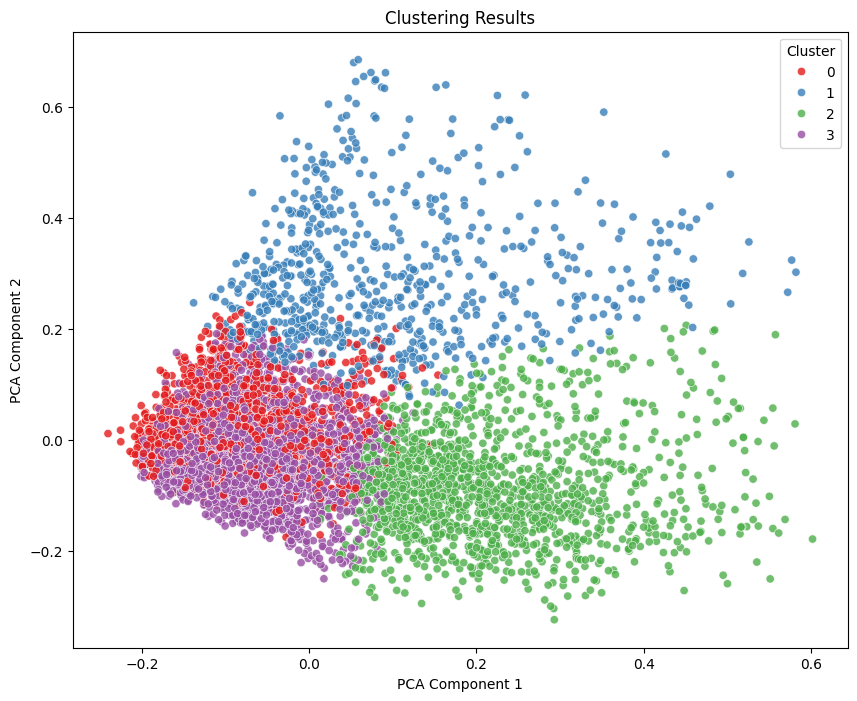

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_clust.toarray())

sampled_df_clst['pca_1'] = pca_result[:, 0]
sampled_df_clst['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=sampled_df_clst, palette='Set1', legend='full', alpha=0.8)
plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix_clust)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sampled_df_clst['cluster'] = clusters

<ipython-input-32-c1d850de5b16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['cluster'] = clusters


In [ ]:
first_news_text = cl_news.loc[0, 'clean_text'].split()
first_clust_text = sampled_df_clst[sampled_df_clst['cluster'] == 0]['clean_text'].iloc[0].split()
similarity_score = calculate_similarity(first_clust_text, first_news_text, word2vec_model)

print(f"Оценка схожести: {similarity_score}")

Оценка схожести: 0.8406181335449219


<ipython-input-34-07c0d35f3980>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['pca_1'] = pca_result[:, 0]
<ipython-input-34-07c0d35f3980>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df_clst['pca_2'] = pca_result[:, 1]


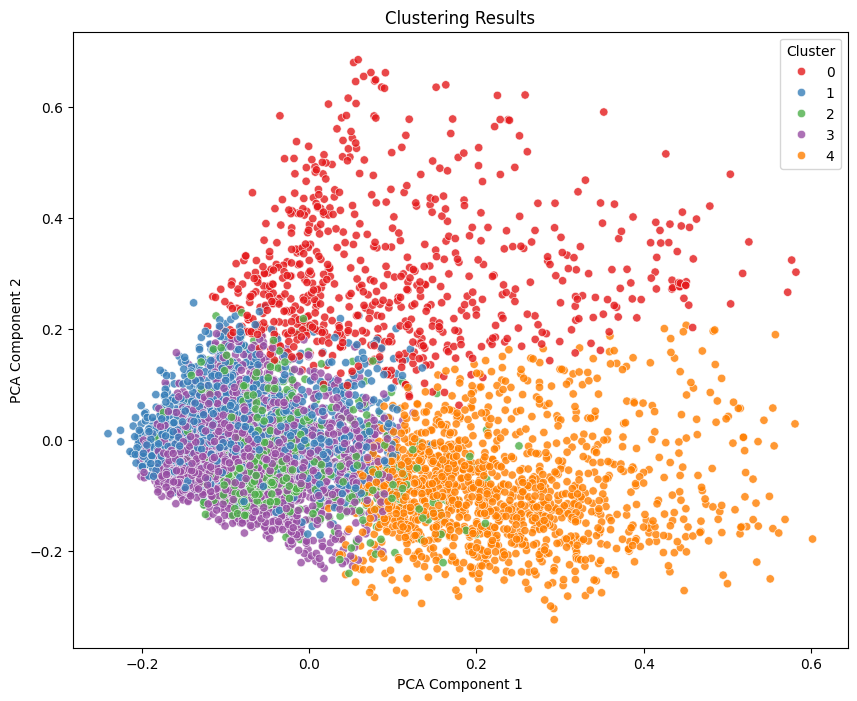

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_clust.toarray())

sampled_df_clst['pca_1'] = pca_result[:, 0]
sampled_df_clst['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_1', y='pca_2', hue='cluster', data=sampled_df_clst, palette='Set1', legend='full', alpha=0.8)
plt.title('Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()